In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_csv("Desktop/resources/customer_data.csv")
payment = pd.read_csv("Desktop/resources/payment_data.csv")

In [3]:
customer.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
payment.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [6]:
customer.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [7]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [8]:
customer["fea_2"].mean(), customer["fea_2"].median()

(1283.9113729508197, 1281.5)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
customer["label"].value_counts().index , customer["label"].value_counts().values #def test_get_all_by_host_with_pool(self):

(Int64Index([0, 1], dtype='int64'), array([900, 225]))

<AxesSubplot:title={'center':'Risk Dağılımı'}, xlabel='Risk Düzeyi', ylabel='Toplam Sayı'>

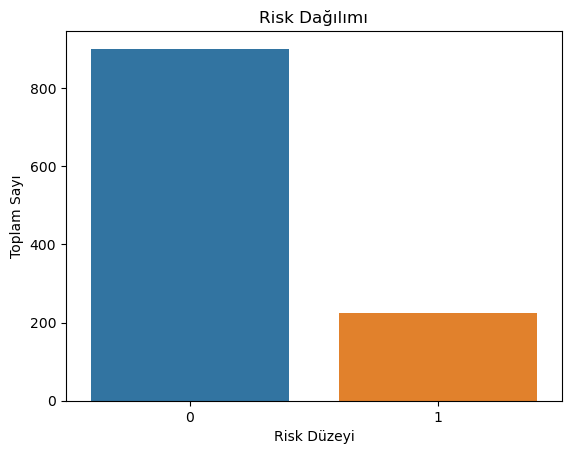

In [40]:
df_graph = pd.DataFrame({
    "Risk Düzeyi": customer["label"].value_counts().index, #Soldan sağa 
    "Toplam Sayı":customer["label"].value_counts().values # alttan yukarıya 
})
plt.title("Risk Dağılımı") # 
sns.barplot(data=df_graph, x="Risk Düzeyi", y="Toplam Sayı")

<AxesSubplot:title={'center':'Ana'}, xlabel='Risk Düzeyi', ylabel='count'>

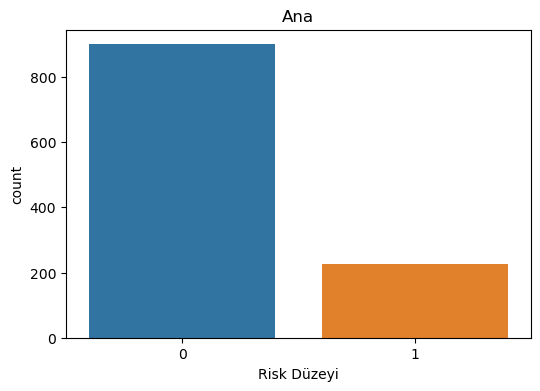

In [47]:
df_graph = pd.DataFrame({
    "Risk Düzeyi" : customer["label"]
})
plt.figure(figsize=(6, 4))
plt.title("Ana")
sns.countplot(x = "Risk Düzeyi", data = df_graph )

<AxesSubplot:xlabel='label', ylabel='count'>

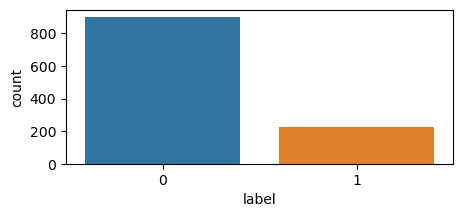

In [38]:
plt.figure(figsize=(5, 2))
sns.countplot(x= customer["label"], data = customer )

In [11]:
customer["fea_2"].fillna(customer["fea_2"].mean(), inplace=True) # boş olan alanları doldurduk 
customer.isna().sum()  

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [12]:
#girişi ve çıkışı belirlemem gerek
y = customer["label"] # y = output
X = customer.drop(["label", "id"], axis=1) #axis vermek zorundayız , X = input
X

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...
1120,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [13]:
from collections import Counter

In [14]:
Counter(y) # counter fonsiyonunla kaç tane bir kaç tane sıfır var diye gösterir(Tuple döndürür)
# ya fazlaları düşürürüz (mantıksız), az olanı yükseltiriz(yeniden örnekleme-> birleri fazlalaştırıcaz)
#düzgün bir sınıflandırma yapıcaksak eksik olan değeri yükseltmemiz lazım

Counter({1: 225, 0: 900})

In [15]:
 from imblearn.over_sampling import RandomOverSampler # istediğimiz eksik olan random olarak örnek üretecek 

In [16]:
sampler = RandomOverSampler() # nesne oluşturduk , eksik değerleri tamamlıyoruz
X_new, y_new = sampler.fit_resample(X, y)

In [17]:
Counter(y_new) # eksik olan değerleri fazla olan değerlere kadar yükselttik

Counter({1: 900, 0: 900})

In [18]:
X_new.shape # 1800 satır, 11 sütun 

(1800, 11)

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, # modelin performansını ölçüceksek dördünü kullanırız
                                                   test_size=0.2,
                                                   random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier # klasifikasyon, regresyon
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.tree import DecisionTreeRegressor # regresyon için bunu kullanırız

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [23]:
print(f"Train set accuracy score = {accuracy_score(y_train, model.predict(X_train))}")
print(f"Test set accuracy score = {accuracy_score(y_test, model.predict(X_test))}")

Train set accuracy score = 1.0
Test set accuracy score = 0.8333333333333334


[Text(0.44861641221374043, 0.9736842105263158, 'X[3] <= 79500.0\ngini = 0.5\nsamples = 1440\nvalue = [724, 716]'),
 Text(0.16297709923664122, 0.9210526315789473, 'X[3] <= 61500.0\ngini = 0.451\nsamples = 565\nvalue = [194, 371]'),
 Text(0.11068702290076336, 0.868421052631579, 'X[10] <= 224.418\ngini = 0.398\nsamples = 328\nvalue = [90, 238]'),
 Text(0.09541984732824428, 0.8157894736842105, 'X[9] <= 60002.0\ngini = 0.375\nsamples = 300\nvalue = [75, 225]'),
 Text(0.08931297709923663, 0.7631578947368421, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.10152671755725191, 0.7631578947368421, 'X[10] <= 207.127\ngini = 0.367\nsamples = 297\nvalue = [72, 225]'),
 Text(0.08931297709923663, 0.7105263157894737, 'X[10] <= 200.12\ngini = 0.389\nsamples = 268\nvalue = [71, 197]'),
 Text(0.083206106870229, 0.6578947368421053, 'X[5] <= 15.5\ngini = 0.382\nsamples = 265\nvalue = [68, 197]'),
 Text(0.07709923664122137, 0.6052631578947368, 'X[9] <= 60093.0\ngini = 0.376\nsamples = 263\nvalue = [66, 

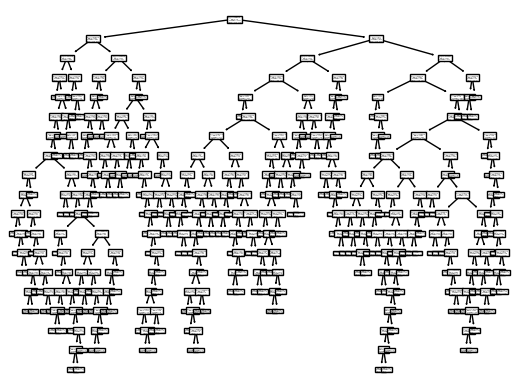

In [24]:
tree.plot_tree(model) # alfa değerleri ne kadar yüksekse ağaç o kadar verimlidir
#alfa değerleri ne kadar paralelse ağaç o kadar doğru 

In [25]:
#ağaçtaki alfa değerlerini alıyoruz
path = model.cost_complexity_pruning_path(X_train, y_train)

alphas = path["ccp_alphas"] 

In [26]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    model_prune = DecisionTreeClassifier(ccp_alpha=i)
    
    model_prune.fit(X_train, y_train)
    y_train_pred = model_prune.predict(X_train)
    y_test_pred = model_prune.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

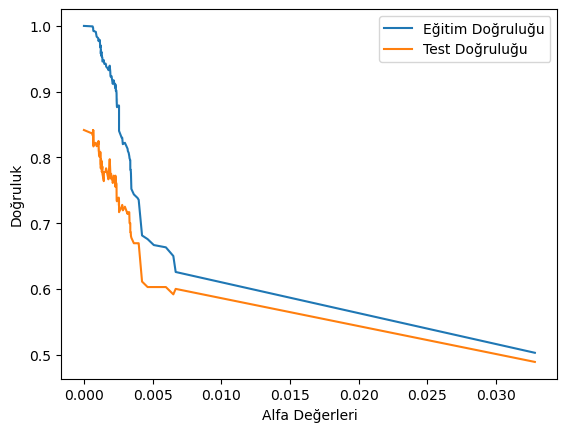

In [35]:
sns.lineplot(y=accuracy_train,x=alphas,label='Eğitim Doğruluğu')
sns.lineplot(y=accuracy_test,x=alphas,label='Test Doğruluğu')
plt.xlabel("Alfa Değerleri")
plt.ylabel("Doğruluk")
plt.xticks()
plt.show()

In [36]:
model_new = DecisionTreeClassifier(ccp_alpha=0.008)
model_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.008)

In [37]:
print(f"Train set accuracy score = {accuracy_score(y_train, model_new.predict(X_train))}")
print(f"Test set accuracy score = {accuracy_score(y_test, model_new.predict(X_test))}")

Train set accuracy score = 0.6256944444444444
Test set accuracy score = 0.6


[Text(0.5, 0.75, 'X[3] <= 79500.0\ngini = 0.5\nsamples = 1440\nvalue = [724, 716]'),
 Text(0.25, 0.25, 'gini = 0.451\nsamples = 565\nvalue = [194, 371]'),
 Text(0.75, 0.25, 'gini = 0.478\nsamples = 875\nvalue = [530, 345]')]

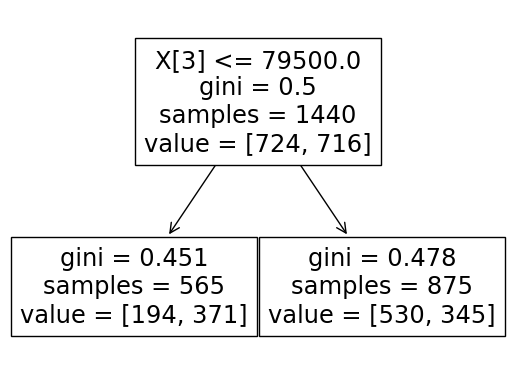

In [38]:
tree.plot_tree(model_new)

<AxesSubplot:>

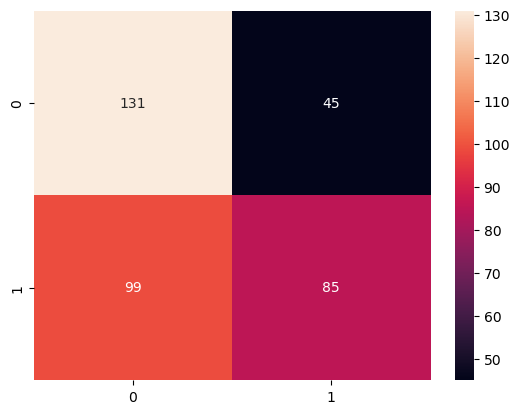

In [39]:
sns.heatmap(confusion_matrix(y_test, model_new.predict(X_test)),
           annot=True, fmt="g") #tahminler hakkında soldan sağa doğru 
#ters yanlış üst sağdan alt sola 
#karmaşıklık matrisi

In [1]:
(131+45+99+85) , (85+131)/360

(360, 0.6)

In [33]:
(131+45+99+85)

360

In [34]:
(85+131)/360

0.6